In [16]:
# Import
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data Prep

In [2]:
# Read in data
basepath = 'C:/Users/Kelsey/Desktop/jobs/TheTrevorProject/Project/data/'
bdata = pd.read_csv(basepath + 'barackobama.csv')
cdata = pd.read_csv(basepath + 'calvinstowell.csv')
kdata = pd.read_csv(basepath + 'kimkardashian.csv')

# Combine data
alldata = pd.concat([bdata, cdata, kdata])
print(alldata.shape)
alldata.head()

(6785, 5)


,created_at,handle,retweet_count,text,id
0,Mon Jun 03 20:59:36 +0000 2019,barackobama,2873,What a life. American history has always been ...,1135652276515823617
1,Thu May 30 20:12:33 +0000 2019,barackobama,13781,"A story worth sharing: Twelve years ago, Brian...",1134190885036535809
2,Thu May 30 15:17:03 +0000 2019,barackobama,4745,Exciting to see the faces of Colombia's future...,1134116519066165249
3,Mon May 27 15:26:55 +0000 2019,barackobama,43244,"On Memorial Day, we remember all those who gav...",1133031835880099840
4,Thu May 23 14:07:16 +0000 2019,barackobama,15144,Great to get out there and take a few cuts at ...,1131562241478864896


In [3]:
alldata.dtypes
# convert the 'Date' column to datetime format 
alldata['date'] = pd.to_datetime(alldata['created_at'])
alldata.head()

,created_at,handle,retweet_count,text,id,date
0,Mon Jun 03 20:59:36 +0000 2019,barackobama,2873,What a life. American history has always been ...,1135652276515823617,2019-06-03 20:59:36
1,Thu May 30 20:12:33 +0000 2019,barackobama,13781,"A story worth sharing: Twelve years ago, Brian...",1134190885036535809,2019-05-30 20:12:33
2,Thu May 30 15:17:03 +0000 2019,barackobama,4745,Exciting to see the faces of Colombia's future...,1134116519066165249,2019-05-30 15:17:03
3,Mon May 27 15:26:55 +0000 2019,barackobama,43244,"On Memorial Day, we remember all those who gav...",1133031835880099840,2019-05-27 15:26:55
4,Thu May 23 14:07:16 +0000 2019,barackobama,15144,Great to get out there and take a few cuts at ...,1131562241478864896,2019-05-23 14:07:16


In [4]:
alldata.dtypes

created_at               object
handle                   object
retweet_count             int64
text                     object
id                        int64
date             datetime64[ns]
dtype: object

### Explore Non-text Fields

In [6]:
# Summarize non-text fields
alldata.groupby(['handle']).agg({
         'id': 'count',    # Sum duration per group
         'retweet_count': [min, max, 'mean'],  # get the count of networks
         'date': [min, max]  # get the first date per group
         }
    )

## Will need to address the unbalanced classes

id retweet_count                                       date  \
              count           min      max          mean                 min   
handle                                                                         
barackobama    1000            65  1641569  19847.329000 2016-02-26 23:08:52   
calvinstowell  2590             0   594760   3699.688803 2019-04-17 19:50:55   
kimkardashian  3195             2   181971   2463.619718 2018-04-05 15:09:29   

                                   
                              max  
handle                             
barackobama   2019-06-03 20:59:36  
calvinstowell 2019-06-03 22:32:04  
kimkardashian 2019-06-03 18:04:56

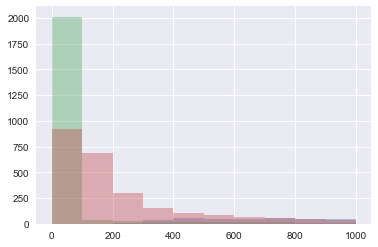

In [15]:
# Distributions of retweet_count
alldata.groupby("handle").retweet_count.hist(alpha=0.4, range=[0,1000])
plt.show()
## Lots of overlap in the lower #'s, prob not very predictive outside of Obamas huge #'s

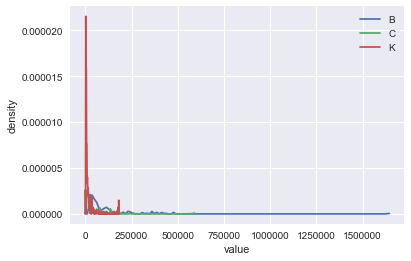

In [8]:
# KDE dists

# plot kde
sns.kdeplot(alldata.retweet_count[alldata.handle == "barackobama"],label='B');
sns.kdeplot(alldata.retweet_count[alldata.handle == "calvinstowell"],label='C');
sns.kdeplot(alldata.retweet_count[alldata.handle == "kimkardashian"],label='K');

# labels
plt.xlabel('value')
plt.ylabel('density')
plt.show()

In [9]:
# Create vars for light pattern of life analysis
alldata['day'] = alldata.created_at.str[:3]
alldata['hour'] = alldata.created_at.str[11:13]

alldata.head()

,created_at,handle,retweet_count,text,id,date,day,hour
0,Mon Jun 03 20:59:36 +0000 2019,barackobama,2873,What a life. American history has always been ...,1135652276515823617,2019-06-03 20:59:36,Mon,20
1,Thu May 30 20:12:33 +0000 2019,barackobama,13781,"A story worth sharing: Twelve years ago, Brian...",1134190885036535809,2019-05-30 20:12:33,Thu,20
2,Thu May 30 15:17:03 +0000 2019,barackobama,4745,Exciting to see the faces of Colombia's future...,1134116519066165249,2019-05-30 15:17:03,Thu,15
3,Mon May 27 15:26:55 +0000 2019,barackobama,43244,"On Memorial Day, we remember all those who gav...",1133031835880099840,2019-05-27 15:26:55,Mon,15
4,Thu May 23 14:07:16 +0000 2019,barackobama,15144,Great to get out there and take a few cuts at ...,1131562241478864896,2019-05-23 14:07:16,Thu,14


In [14]:
pd.options.display.max_columns = None

# Distributions of hour
display(pd.crosstab(alldata.handle, alldata.hour))
# Obama slightly diff pattern (bulk of activity in 7 hour span), but otherwise not super differentiating patterns

hour,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
handle,,,,,,,,,,,,,,,,,,,,,,,,
barackobama,19,8,5,3,6,1,0,0,0,0,0,1,1,19,37,143,140,107,108,110,104,109,55,24
calvinstowell,166,173,145,137,49,8,3,1,5,18,10,59,141,183,168,158,196,163,130,136,119,144,148,130
kimkardashian,148,278,152,135,113,89,57,16,19,7,1,6,14,50,171,184,195,250,231,315,224,170,188,182


In [12]:
# Distributions of day
pd.crosstab(alldata.handle, alldata.day)
## Obama less on weekends, everyone else pr consistant

day,Fri,Mon,Sat,Sun,Thu,Tue,Wed
handle,,,,,,,
barackobama,192,183,52,44,185,165,179
calvinstowell,391,319,303,351,392,390,444
kimkardashian,588,703,307,287,471,444,395


### Explore Text

In [106]:
# Split dataframes
# Feel like i should sample larger classes & test, but maybe not to Obama size since he is gonna be the easiest to detect?
# 1 - undersample calvin & kim's and do split on 1000 tweet corpuses
# 2 - cross validation on samples & test
# 3 - Run 2 class classification models w/ calvin & kim only and see if helps differentiate
# 4? - Markov chain obama and create more tweets, hah

## Option 1 - 80/20 of 1000 tweet samples
# Limit Calvin & Kim to random 1000
cdata_lim = cdata.sample(n=1000, random_state=1)
cdata_left = cdata.drop(cdata_lim.index)
kdata_lim = kdata.sample(n=1000, random_state=1)
kdata_left = kdata.drop(kdata_lim.index)

# Split & Combine
tb = bdata.sample(frac=0.8, random_state=1)
vb = bdata.drop(tb.index)
tc = cdata_lim.sample(frac=0.8, random_state=1)
vc = cdata_left.sample(n=200, random_state=1)
tk = kdata_lim.sample(frac=0.8, random_state=1)
vk = kdata_left.sample(n=200, random_state=1)

train1 = pd.concat([tb, tc, tk])
valid1 = pd.concat([vb, vc, vk])
all1 = pd.concat([bdata, cdata_lim, kdata_lim])


## Option 2 - different sample
# Limit Calvin & Kim to random 1000
cdata_lim = cdata.sample(n=1000, random_state=2)
cdata_left = cdata.drop(cdata_lim.index)
kdata_lim = kdata.sample(n=1000, random_state=2)
kdata_left = kdata.drop(kdata_lim.index)

# Split & Combine
tb = bdata.sample(frac=0.8, random_state=2)
vb = bdata.drop(tb.index)
tc = cdata_lim.sample(frac=0.8, random_state=2)
vc = cdata_left.sample(n=200, random_state=2)
tk = kdata_lim.sample(frac=0.8, random_state=2)
vk = kdata_left.sample(n=200, random_state=2)

train2 = pd.concat([tb, tc, tk])
valid2 = pd.concat([vb, vc, vk])
all2 = pd.concat([bdata, cdata_lim, kdata_lim])




# Current set
train = train2
valid = valid2
alldat =  all2

# Shuffle
train = train.sample(frac=1).reset_index(drop=True)
valid = valid.sample(frac=1).reset_index(drop=True)
alldat = alldat.sample(frac=1).reset_index(drop=True)

print(train.shape)
print(valid.shape)
print(alldat.shape)

(2400, 5)
(600, 5)
(3000, 5)


In [107]:
import re
import nltk

stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['wouldnt', 'wont', 'werent', 'wasnt', 'shouldnt', 'neednt', 'isnt', 'havent', 'hasnt', 'hadnt', 'ive','doesnt', 'didnt', 'couldnt', 'arent', 'aint', 'amp'])

In [108]:
import string
string.punctuation
punctuation = string.punctuation + '’' + '–' + '“' + '”'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~’–“”'

In [109]:
# Text clean/transform function

def textonly(text):
    # Remove URLS
    text = re.sub('https?:\/\/.*', '', text)
    # Remove Punctuation
    text = re.sub('—', ' ', text)
    text  = "".join([char for char in text if char not in punctuation])
    # Lowercase
    text = text.lower()
    # Remove Stopwords, Tokenize
    return [word for word in nltk.word_tokenize(text) if word not in stopwords]

#def textplus(text):
    # Create indicator for URLs & Remove (Could be interesting to unshorten & use, but not for this)
    
    # Create Punctuation features
    # Num . num , num ! num? num @ num# num% num digits num$ (.? and ! w and w/o repeated for testing) - num capitalized letters, 
    
    # Extract lists of alltime tagged handles for each acct, create indicator feature for each? = basic SNA
    
    # Remove Punctuation
    
    # Features with Emogis or treat as words?
    
    # Lowcase
    
    # Create Length features
    # # words
    
    # Remove stopwords, Tokenize
    
    # Stem?

In [110]:
pd.options.display.max_colwidth = 500
train['text_bascln'] = train['text'].apply(lambda x: textonly(x))
train[['text', 'text_bascln']].head(10)

,text,text_bascln
0,LIVE: President Obama is in Miami talking about the progress made possible by the Affordable Care Act. https://t.co/7FsQXut07O,"[live, president, obama, miami, talking, progress, made, possible, affordable, care, act]"
1,he’s exhausted from a long day of doing absolutely nothing https://t.co/5wufluVxn8,"[hes, exhausted, long, day, absolutely, nothing]"
2,Show your support for the proposal to expand paid sick leave—add a comment today: https://t.co/3zFKbN3E0v #LeadOnLeave,"[show, support, proposal, expand, paid, sick, leave, add, comment, today]"
3,@aguirreryan @TylerDinucci LMAOOOO,"[aguirreryan, tylerdinucci, lmaoooo]"
4,@ASalasmex thank you 😍,"[asalasmex, thank, 😍]"
5,https://t.co/NDUulGEkEx,[]
6,RT @kanyewest: don't trade your authenticity for approval,"[rt, kanyewest, dont, trade, authenticity, approval]"
7,oh jesus christ https://t.co/Xiv2cdvaBH,"[oh, jesus, christ]"
8,Bundles sold out! We still have the #KKWxMARIO palette and glosses in stock!! Shop now https://t.co/PoBZ3bhjs8! https://t.co/4Zg0WTlxJD,"[bundles, sold, still, kkwxmario, palette, glosses, stock, shop]"
9,Refusing to hold hearings for a president's #SCOTUS nominee has never happened before. https://t.co/G7knZPAy7x,"[refusing, hold, hearings, presidents, scotus, nominee, never, happened]"


In [111]:
from sklearn.preprocessing import LabelEncoder

# Encode label
y = alldat['handle']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
# alpha order - 0=barack, 1 = calvin, 2=kim

In [112]:
X = alldat['text']

from sklearn.model_selection import train_test_split

# 80-20 splitting the dataset (80%->Training and 20%->Validation)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)

In [113]:
from sklearn.feature_extraction.text import CountVectorizer

# defining the bag-of-words transformer on the text-processed corpus # i.e., text_process() declared in II is executed...
bow_transformer=CountVectorizer(analyzer=textonly).fit(X_train)
# transforming into Bag-of-Words and hence textual data to numeric..
text_bow_train=bow_transformer.transform(X_train)#ONLY TRAINING DATA
# transforming into Bag-of-Words and hence textual data to numeric..
text_bow_test=bow_transformer.transform(X_test)#TEST DATA

In [114]:
from sklearn.naive_bayes import MultinomialNB

# instantiating the model with Multinomial Naive Bayes..
model = MultinomialNB()
# training the model...
model = model.fit(text_bow_train, y_train)

In [115]:
# Training accuracy
model.score(text_bow_train, y_train)

0.97124999999999995

In [116]:
# Validation accuracy
model.score(text_bow_test, y_test)

0.84333333333333338

In [131]:
from sklearn.metrics import classification_report
 
# getting the predictions of the Validation Set...
predictions = model.predict(text_bow_test)
# getting the Precision, Recall, F1-Score
print(classification_report(y_test,predictions))

600
             precision    recall  f1-score   support

          0       0.82      0.96      0.89       197
          1       0.85      0.82      0.83       200
          2       0.86      0.75      0.80       203

avg / total       0.85      0.84      0.84       600



In [118]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)

array([[190,   2,   5],
       [ 17, 164,  19],
       [ 24,  27, 152]])

In [119]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=20):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print(classlabel, feat, coef)


print("Obama Important Features")
most_informative_feature_for_class(bow_transformer, model, 0)
print()
print("Calvin Important Features")
most_informative_feature_for_class(bow_transformer, model, 1)
print()
print("Kim Important Features")
most_informative_feature_for_class(bow_transformer, model, 2)

Obama Important Features
0 americans -5.83041512559
0 make -5.78596336302
0 today -5.7434037486
0 people -5.68277912678
0 fair -5.66336104093
0 vote -5.64431284596
0 us -5.62562071294
0 hearing -5.57155349167
0 doyourjob -5.50373089533
0 climate -5.48747037446
0 supreme -5.40991214012
0 change -5.36610951746
0 court -5.36610951746
0 garland -5.35192488247
0 judge -5.25789593282
0 rt -5.10374525299
0 leaders -5.02963728084
0 senate -4.8610145684
0 obama -4.85243082471
0 president -4.81058371477

Calvin Important Features
1 still -6.56865606546
1 happy -6.51149765162
1 know -6.51149765162
1 literally -6.51149765162
1 love -6.51149765162
1 stevemorris -6.51149765162
1 yall -6.51149765162
1 good -6.45743043035
1 legend -6.45743043035
1 omg -6.40613713597
1 trump -6.3573469718
1 really -6.22381557917
1 one -6.1437728715
1 dont -6.10603254352
1 gay -6.03457357953
1 people -5.79095149688
1 like -5.76428324979
1 yashar -5.64066929383
1 im -5.48984640409
1 rt -4.09360171212

Kim Important Featu

In [120]:
import pickle

# Save model
# save the model to disk
filename = basepath + 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [124]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(bow_transformer.transform(X_test), y_test)
print(result)

0.843333333333


In [147]:
# Predict for a single input
type(X_test)
testcase = "Don’t make time for people who don’t make time for you. https://t.co/5iSinrlCz1"
print(loaded_model.predict_proba(bow_transformer.transform([testcase]))) 
print(loaded_model.predict(bow_transformer.transform([testcase]))) 

[[ 0.87082826  0.12684841  0.00232333]]
[0]


In [141]:
print(len(X_test))
print(len(y_test))
print(len(predictions))

df = pd.DataFrame()
df['X'] = X_test
df["actual"] = y_test
df["predicted"] = predictions

# Look at misclassifieds
df[df['actual'] != df['predicted']]

600
600
600


,X,actual,predicted
1098,MY BODY IS READY https://t.co/jsC49ndgix,1,2
2027,So cool! ✨💕 https://t.co/c4LsWbXWwG,2,1
2612,We love you @kaaauthor! https://t.co/tPtT9lWWti,1,2
98,"“The idea was to expand the concept of family, as it’s part of our history, and we wanted other families of women. In the case of the Kardashians, they are all three of them very strong women, with strong personalities. It’s an iconic family"" - Silvia Venturini Fendi",2,0
1201,Don’t make time for people who don’t make time for you. https://t.co/5iSinrlCz1,1,0
1228,Usted y su familia merecen la tranquilidad de saber que están cubiertos. El mercado de seguros abre mañana. https://t.co/9iRCkLRGZD,0,2
1135,"Can you imagine such a milquetoast response from the GOP if Obama had praised Kim Jong-un endlessly? Remember when he bowed to show respect to an ally and they collectively lost their shit for about 1,000 news cycles? https://t.co/jjlwIoqE0y",1,0
205,Happy #StPatricksDay. https://t.co/VuguIeyUO1,0,2
2300,RT @Erin_Demo: https://t.co/IXgA7LGj7D,1,2
607,Happy #PiDay. https://t.co/gDZPJwKFk7,0,2


In [ ]:
# predict single


In [ ]:
import codecs, re, time
from itertools import chain

import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

trainfile = 'train.txt'

# Vectorizing data.
train = []
word_vectorizer = CountVectorizer(analyzer='word')
trainset = word_vectorizer.fit_transform(codecs.open(trainfile,'r','utf8'))
tags = ['bs','pt','es','sr']

# Training NB
mnb = MultinomialNB()
mnb.fit(trainset, tags)

def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print classlabel, feat, coef



most_informative_feature_for_class(word_vectorizer, mnb, 'bs')
print 
most_informative_feature_for_class(word_vectorizer, mnb, 'pt')

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

countVectorizer = CountVectorizer(analyzer=textonly) 
countVector = countVectorizer.fit_transform(train['text'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

2400 Number of tweets has 6256 words


In [73]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

0  000  0123  0130  0131  0203  0205  0407  0413  0420  0423  0524  0527  \
0  0    0     0     0     0     0     0     0     0     0     0     0     0   
1  0    0     0     0     0     0     0     0     0     0     0     0     0   
2  0    0     0     0     0     0     0     0     0     0     0     0     0   
3  0    0     0     0     0     0     0     0     0     0     0     0     0   
4  0    0     0     0     0     0     0     0     0     0     0     0     0   

   0608  0620  0621  0714  0715  0717  1  10  100  1000  100000  100th  10am  \
0     0     0     0     0     0     0  0   0    0     0       0      0     0   
1     0     0     0     0     0     0  0   0    0     0       0      0     0   
2     0     0     0     0     0     0  0   0    0     0       0      0     0   
3     0     0     0     0     0     0  0   0    0     0       0      0     0   
4     0     0     0     0     0     0  0   0    0     0       0      0     0   

   10ml  10off  10pan  10pm  10velociraptors  11  110th  112  1123  1125  \
0     0      0      0     0                0   0      0    0     0     0   
1     0      0      0     0                0   0      0    0     0     0   
2     0      0      0     0                0   0      0    0     0     0   
3     0      0      0     0                0   0      0    0     0     0   
4     0      0      0     0                0   0      0    0     0     0   

   1135  1159pm  11am  12  1215  1224  1230  1240  1250  12pm  12yearold  \
0     0       0     0   0     0     0     0     0     0     0          0   
1     0       0     0   0     0     0     0     0     0     0          0   
2     0       0     0   0     0     0     0     0     0     0          0   
3     0       0     0   0     0     0     0     0     0     0          0   
4     0       0     0   0     0     0     0     0     0     0          0   

   130pm  135  136  139  13th  13year  14  140  14th  15  150  151000  1520  \
0      0    0    0    0     0       0   0    0     0   0    0       0     0   
1      0    0    0    0     0       0   0    0     0   0    0       0     0   
2      0    0    0    0     0       0   0    0     0   0    0       0     0   
3      0    0    0    0     0       0   0    0     0   0    0       0     0   
4      0    0    0    0     0       0   0    0     0   0    0       0     0   

   1526720  155  156000  15lbs  16  160000  161000  16year  16yearold  170  \
0        0    0       0      0   0       0       0       0          0    0   
1        0    0       0      0   0       0       0       0          0    0   
2        0    0       0      0   0       0       0       0          0    0   
3        0    0       0      0   0       0       0       0          0    0   
4        0    0       0      0   0       0       0       0          0    0   

   175  17💥  18  19  190  1968  1973  1975  1993  1995  1997  1pm  1st  2  20  \
0    0    0   0   0    0     0     0     0     0     0     0    0    0  0   0   
1    0    0   0   0    0     0     0     0     0     0     0    0    0  0   0   
2    0    0   0   0    0     0     0     0     0     0     0    0    0  0   0   
3    0    0   0   0    0     0     0     0     0     0     0    0    0  0   0   
4    0    0   0   0    0     0     0     0     0     0     0    0    0  0   0   

   200  2009  2010  2011  2013  2014  2015  2016  2017  2018  2019  2019…  \
0    0     0     0     0     0     0     0     0     0     0     0      0   
1    0     0     0     0     0     0     0     0     0     0     0      0   
2    0     0     0     0     0     0     0     0     0     0     0      0   
3    0     0     0     0     0     0     0     0     0     0     0      0   
4    0     0     0     0     0     0     0     0     0     0     0      0   

   2020  2025  2027  2043  20th  21  22  23  230130c  23yearold  24  242000  \
0     0     0     0     0     0   0   0   0        0          0   0       0   
1     0     0     0     0     0   0   0   0        0          0   0       0   
2 